# Entregável 1 - visão computacional

In [113]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [114]:
rintin = cv2.imread("RinTinTin.jpg")

In [115]:
rintin.shape

(240L, 320L, 3L)

In [116]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [117]:
rintin_gray.shape

(240L, 320L)

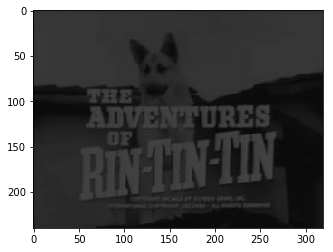

In [118]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

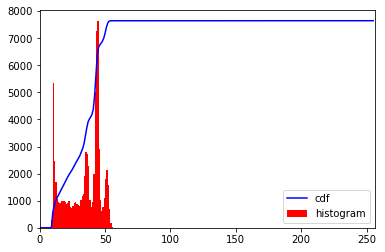

In [119]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'best')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## 1

O histograma informa que o  espectro de cores não foi bem utilizado, pois os pixels estão todos concentrados no 'começo' da faixa de cores, ou seja a imagem é bastante escura.

## 2

In [120]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


In [121]:
rintin_gray = cdf[rintin_gray]


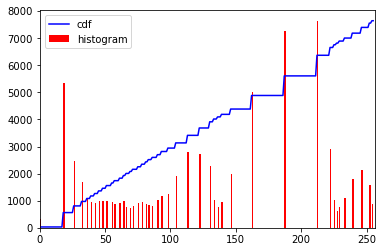

In [122]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])


cdf = hist.cumsum()

cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'best')
plt.show()

## 3

Imagem redesenhada com as cores redistribuídas no espectro.

O código de equalização do histograma expande o espectro de cores da imagem, deixando os pixels escuros mais escuros e os pixels claros mais claros, podemos perceber isso comparando as regiões escuras e claras na imagem não equalizada e equalizada


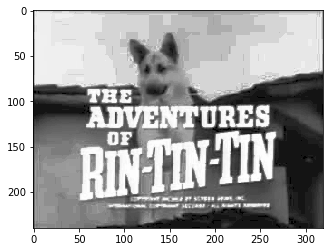

In [123]:
print ('Imagem redesenhada com as cores redistribuídas no espectro.')
print ('')
print ('O código de equalização do histograma expande o espectro de cores da imagem, deixando os pixels escuros mais escuros e os pixels claros mais claros, podemos perceber isso comparando as regiões escuras e claras na imagem não equalizada e equalizada')

plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

In [124]:
rintin_gray

array([[ 61, 136, 162, ..., 146, 146, 130],
       [ 64, 139, 212, ..., 162, 162, 130],
       [ 66, 146, 222, ..., 162, 187, 133],
       ..., 
       [ 39,  81, 113, ...,  51,  51,  48],
       [ 45,  83, 122, ...,  51,  48,  48],
       [ 51,  90, 133, ...,  51,  48,  48]], dtype=uint8)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [125]:
hall = cv2.imread('hall_box_battery1.jpg')

In [126]:
hallrgb = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)

In [127]:
hallrgb

array([[[152, 120,  81],
        [155, 123,  84],
        [154, 122,  84],
        ..., 
        [114, 116, 113],
        [113, 115, 112],
        [113, 115, 112]],

       [[153, 121,  82],
        [155, 123,  84],
        [154, 122,  84],
        ..., 
        [118, 120, 117],
        [117, 119, 116],
        [122, 124, 121]],

       [[155, 123,  85],
        [156, 124,  86],
        [154, 124,  86],
        ..., 
        [118, 120, 117],
        [117, 119, 116],
        [122, 124, 121]],

       ..., 
       [[ 79,  62,  55],
        [ 79,  64,  57],
        [ 89,  72,  65],
        ..., 
        [ 30,  20,   8],
        [ 41,  32,  17],
        [ 47,  38,  23]],

       [[ 82,  63,  57],
        [ 83,  66,  59],
        [ 89,  70,  66],
        ..., 
        [ 38,  29,  14],
        [ 44,  32,  18],
        [ 46,  34,  20]],

       [[ 91,  72,  66],
        [ 87,  68,  62],
        [ 85,  66,  62],
        ..., 
        [ 47,  38,  23],
        [ 49,  37,  23],
        [ 46,  34,

In [128]:
hall

array([[[ 81, 120, 152],
        [ 84, 123, 155],
        [ 84, 122, 154],
        ..., 
        [113, 116, 114],
        [112, 115, 113],
        [112, 115, 113]],

       [[ 82, 121, 153],
        [ 84, 123, 155],
        [ 84, 122, 154],
        ..., 
        [117, 120, 118],
        [116, 119, 117],
        [121, 124, 122]],

       [[ 85, 123, 155],
        [ 86, 124, 156],
        [ 86, 124, 154],
        ..., 
        [117, 120, 118],
        [116, 119, 117],
        [121, 124, 122]],

       ..., 
       [[ 55,  62,  79],
        [ 57,  64,  79],
        [ 65,  72,  89],
        ..., 
        [  8,  20,  30],
        [ 17,  32,  41],
        [ 23,  38,  47]],

       [[ 57,  63,  82],
        [ 59,  66,  83],
        [ 66,  70,  89],
        ..., 
        [ 14,  29,  38],
        [ 18,  32,  44],
        [ 20,  34,  46]],

       [[ 66,  72,  91],
        [ 62,  68,  87],
        [ 62,  66,  85],
        ..., 
        [ 23,  38,  47],
        [ 23,  37,  49],
        [ 20,  34,

In [129]:
hallr, hallg, hallb = cv2.split(hall)
print (hallg)

[[120 123 122 ..., 116 115 115]
 [121 123 122 ..., 120 119 124]
 [123 124 124 ..., 120 119 124]
 ..., 
 [ 62  64  72 ...,  20  32  38]
 [ 63  66  70 ...,  29  32  34]
 [ 72  68  66 ...,  38  37  34]]


In [130]:
#blue = hall[100, 100, 0]
#print ('blue:', blue)

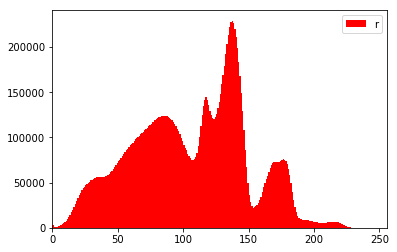

In [131]:
plt.hist(hallr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('r'), loc = 'best')
plt.show()

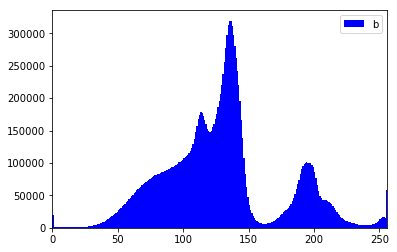

In [132]:
plt.hist(hallb.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('b'), loc = 'best')
plt.show()

## 1

A partir dos histogramas apenas, não é possível identificar a caixa vermelha e a bateria azul. Não temos nenhum indicador de posição, apenas o espectro de quais tons de vermelho/azul estão sendo usados, não podendo identificar nem a caixa e a bateria.

In [133]:
hall = cv2.imread('hall_box_battery1.jpg')
hallrgb = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)

for i in range(hallrgb.shape[0]):
    for j in range(hallrgb.shape[1]):
        if hallrgb [i] [j] [0] > 165 and hallrgb [i] [j] [1] < 130 and hallrgb [i] [j] [2]  < 130:
            hallrgb [i] [j] [0] = 255
            hallrgb  [i] [j] [1] = 255
            hallrgb [i] [j] [2] = 255
        elif hallrgb [i] [j] [0] + hallrgb [i] [j] [1] + hallrgb [i] [j] [2] > 650:
            hallrgb [i] [j] [0] = 0
            hallrgb  [i] [j] [1] = 0
            hallrgb [i] [j] [2] = 0
        else:
            hallrgb [i] [j] [0] = 0
            hallrgb  [i] [j] [1] = 0
            hallrgb [i] [j] [2] = 0

C:\Users\chend\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars


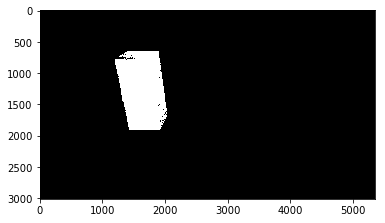

In [134]:
plt.imshow(hallrgb)

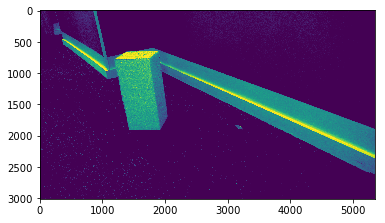

In [135]:
plt.imshow(hallb, vmin=140, vmax=255)